In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv('../dataset/train.csv')


In [4]:
"""
Since there are only date and id columns in the test dataset, and the target column is almost the same
as the temperature column.
I don't think it's necessary to evaluate the correspondence between target and (type, temperature)
""" 

train_data = train_data[['date', 'id', 'target']]
train_data.shape

(4312358, 3)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

"""
Based on the Kaggle course (https://www.kaggle.com/learn/time-series), 
time series = trend + seasonality + cycles + random error,
so I want to analyse the trend, seasonlity element in a time series of certain id.
The chosen ids are the same as task1, which are:
desired_ids = [0, 1, 17, 29, 35, 41, 51, 67, 88]
"""


'\nBased on the Kaggle course (https://www.kaggle.com/learn/time-series), \ntime series = trend + seasonality + cycles + random error,\nso I want to analyse the trend, seasonlity element in a time series of certain id.\nThe chosen ids are the same as task1, which are:\ndesired_ids = [0, 1, 17, 29, 35, 41, 51, 67, 88]\n'

In [74]:
train_data['date'] = pd.to_datetime(train_data['date'], format='%Y%m%d%H')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312358 entries, 0 to 4312357
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   id      int64         
 2   target  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 98.7 MB


In [8]:
weekly_usage = train_data.groupby([train_data['date'].dt.isocalendar().week, 'id'])['target'].sum().reset_index()

In [9]:
weekly_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25948 entries, 0 to 25947
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   week    25948 non-null  UInt32 
 1   id      25948 non-null  int64  
 2   target  25948 non-null  float64
dtypes: UInt32(1), float64(1), int64(1)
memory usage: 532.3 KB


In [10]:
weekly_usage.head()

,week,id,target
0,1,0,57.396
1,1,1,32.611
2,1,2,154.826
3,1,3,63.392
4,1,4,49.206


In [15]:
# List of IDs to plot
desired_ids = [0, 1, 17, 29, 35, 41, 51, 67, 88]  # Replace with the IDs you want to plot
grouped = weekly_usage.groupby('id')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 7 to 25456
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   week    52 non-null     UInt32 
 1   id      52 non-null     int64  
 2   target  52 non-null     float64
dtypes: UInt32(1), float64(1), int64(1)
memory usage: 1.5 KB


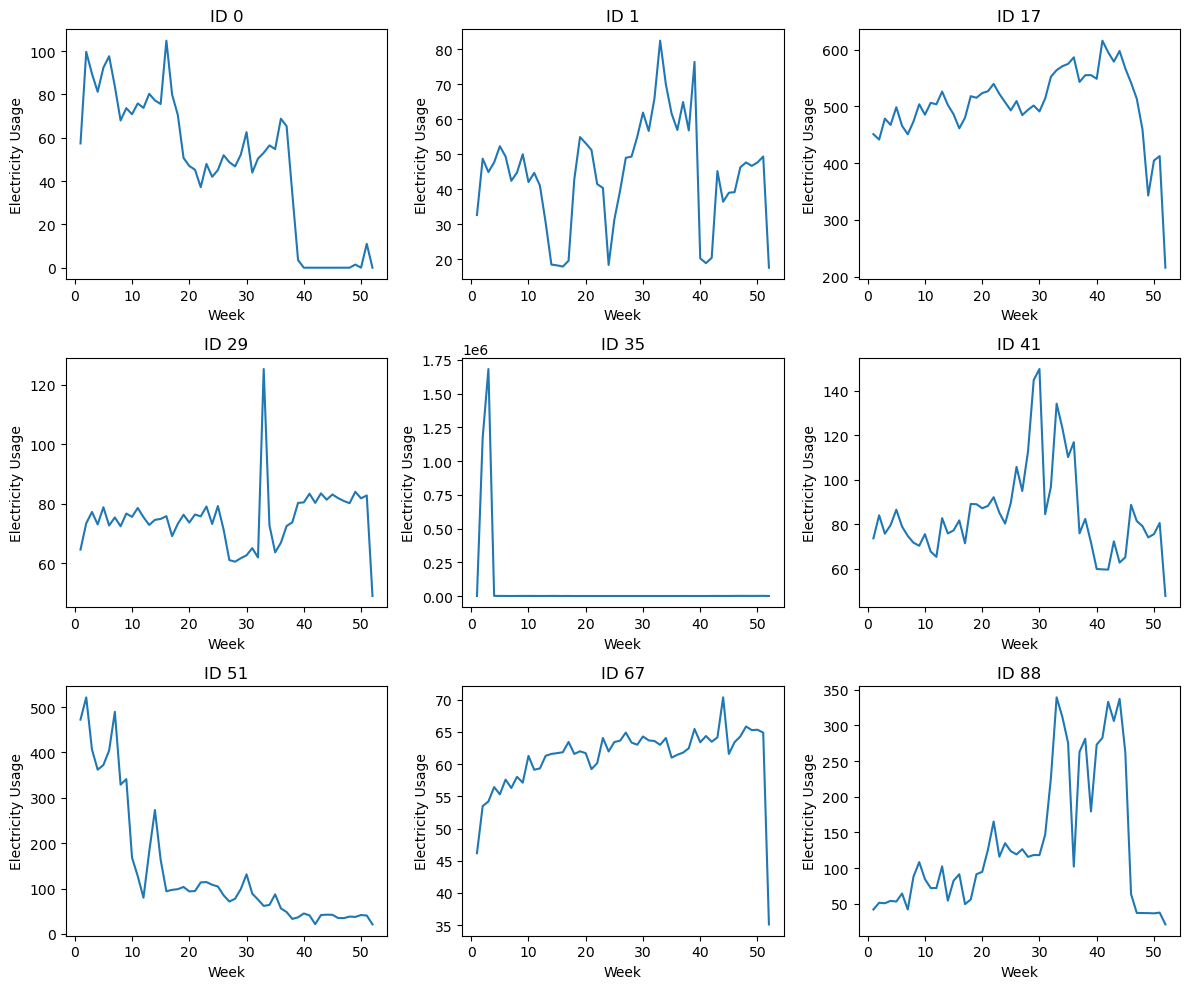

In [41]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

# Iterate over desired IDs and plot the weekly usage trend for each ID
for i, desired_id in enumerate(desired_ids):
    group = grouped.get_group(desired_id)
    
    # Determine the subplot coordinates
    row = i // 3
    col = i % 3
    
    # Plot the weekly electricity usage for the current ID in the corresponding subplot
    axes[row, col].plot(group['week'], group['target'])
    axes[row, col].set_xlabel('Week')
    axes[row, col].set_ylabel('Electricity Usage')
    axes[row, col].set_title(f'ID {desired_id}')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

C:\Users\29237\AppData\Local\Temp\ipykernel_7100\220067757.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['trend'] = group['target'].rolling(window=8, center=True, min_periods=1).mean()
C:\Users\29237\AppData\Local\Temp\ipykernel_7100\220067757.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['trend'] = group['target'].rolling(window=8, center=True, min_periods=1).mean()
C:\Users\29237\AppData\Local\Temp\ipykernel_7100\220067757.py:7: SettingWithCopyWarning: 
A value is trying to be set 

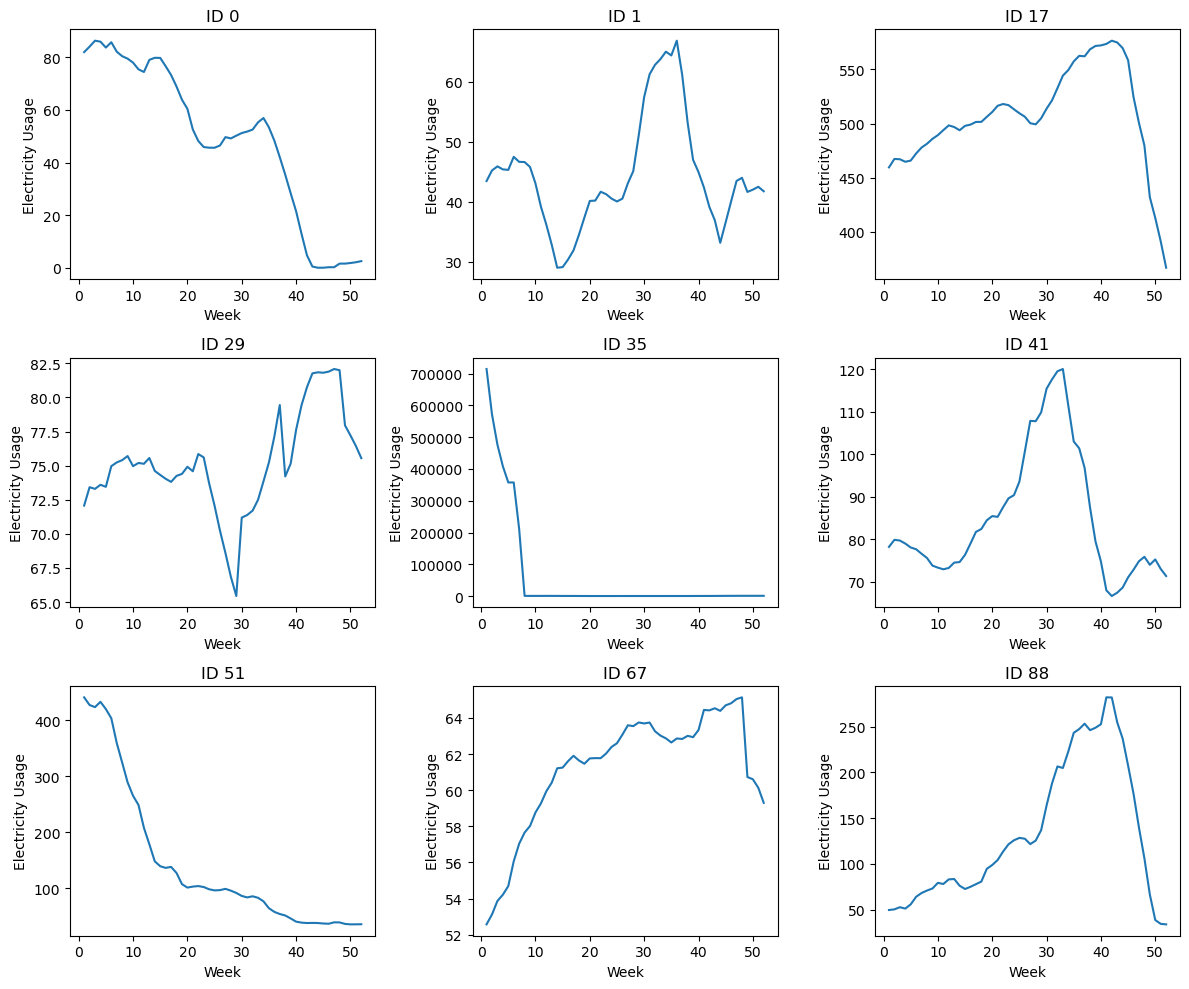

In [37]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

# Iterate over desired IDs and plot the weekly usage moving average for each ID
for i, desired_id in enumerate(desired_ids):
    group = grouped.get_group(desired_id)
    group['trend'] = group['target'].rolling(window=8, center=True, min_periods=1).mean()
    
    # Determine the subplot coordinates
    row = i // 3
    col = i % 3
    
    # Plot the weekly moving average for the current ID in the corresponding subplot
    axes[row, col].plot(group['week'], group['trend'])
    axes[row, col].set_xlabel('Week')
    axes[row, col].set_ylabel('Electricity Usage')
    axes[row, col].set_title(f'ID {desired_id}')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

C:\Users\29237\AppData\Local\Temp\ipykernel_7100\416010040.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['trend'] = group['target'].rolling(window=8, center=True, min_periods=1).mean()
C:\Users\29237\AppData\Local\Temp\ipykernel_7100\416010040.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['de-trend'] = group['target'] - group['trend']
C:\Users\29237\AppData\Local\Temp\ipykernel_7100\416010040.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

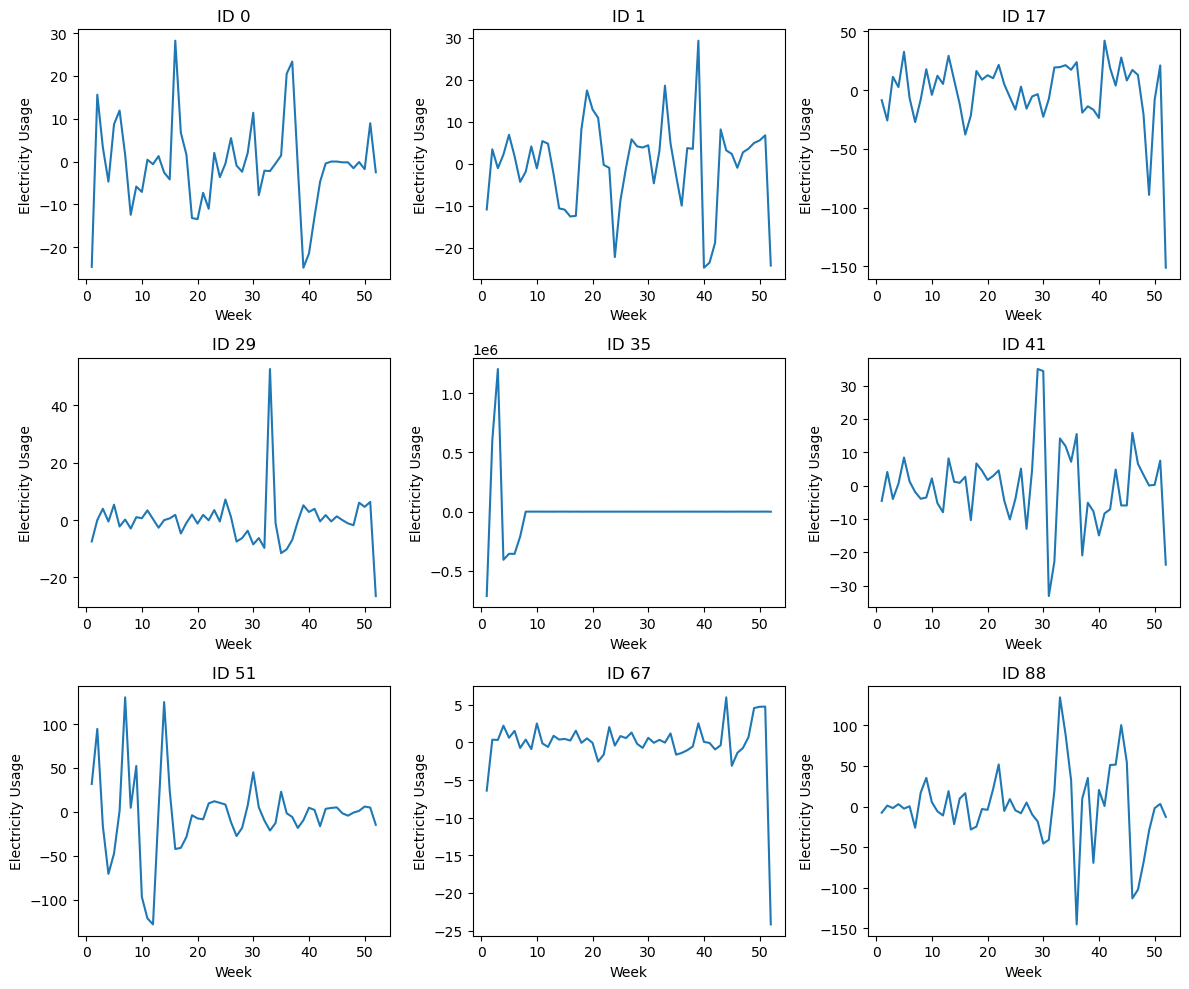

In [40]:
# Remove the Trend

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

# Iterate over desired IDs and plot the weekly de-trend for each ID
for i, desired_id in enumerate(desired_ids):
    group = grouped.get_group(desired_id)
    group['trend'] = group['target'].rolling(window=8, center=True, min_periods=1).mean()
    group['de-trend'] = group['target'] - group['trend']
    
    # Determine the subplot coordinates
    row = i // 3
    col = i % 3
    
    # Plot the weekly de-trend for the current ID in the corresponding subplot
    axes[row, col].plot(group['week'], group['de-trend'])
    axes[row, col].set_xlabel('Week')
    axes[row, col].set_ylabel('Electricity Usage')
    axes[row, col].set_title(f'ID {desired_id}')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [83]:
monthly_usage = train_data.groupby([train_data['id'], train_data['date'].dt.month])['target'].sum()

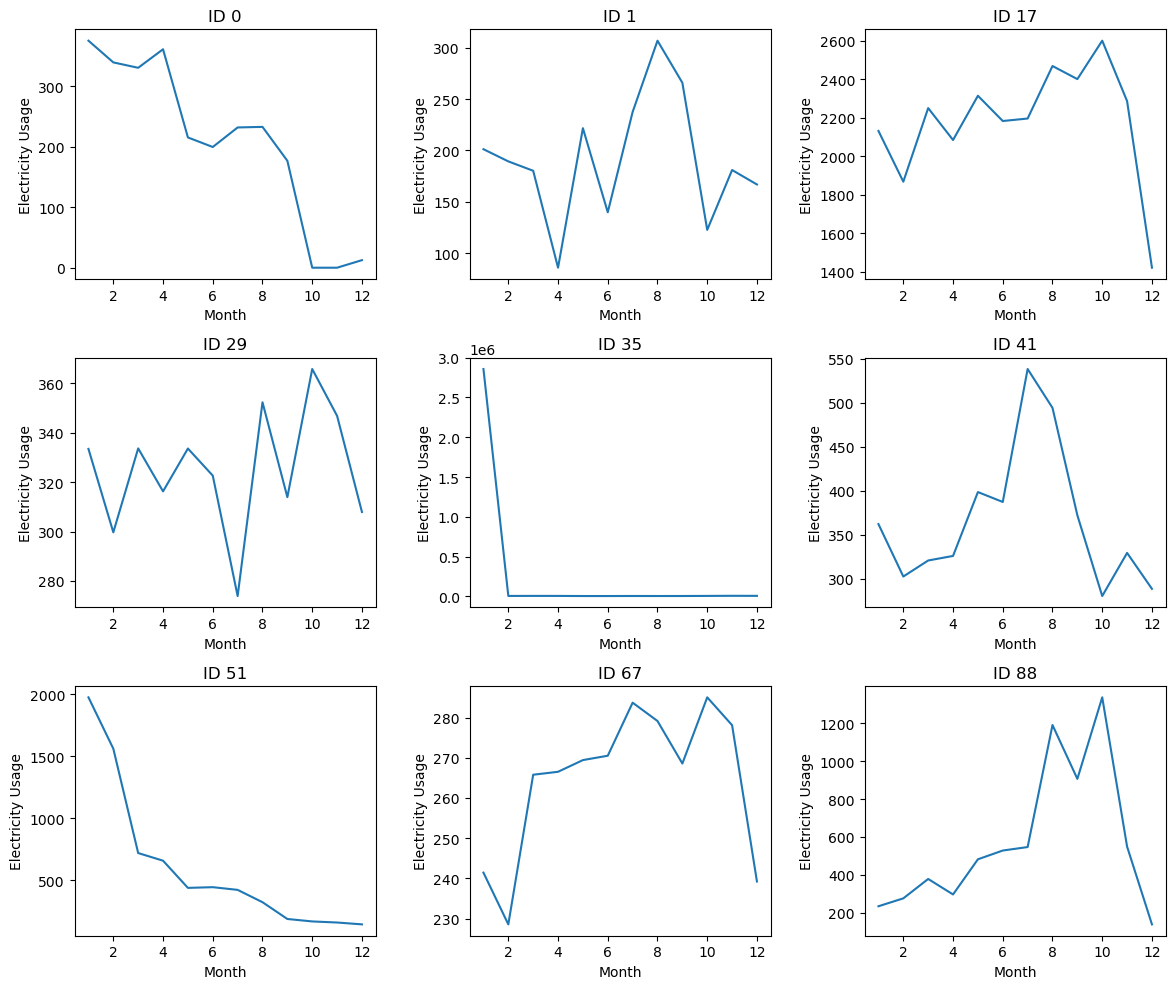

In [95]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

# Iterate over desired IDs and plot the monthly usage for each ID
for i, desired_id in enumerate(desired_ids):
    group = monthly_usage[desired_id]
    
    # Determine the subplot coordinates
    row = i // 3
    col = i % 3
    
    # Plot the monthly usage for the current ID in the corresponding subplot
    axes[row, col].plot(group.index, group.values)
    axes[row, col].set_xlabel('Month')
    axes[row, col].set_ylabel('Electricity Usage')
    axes[row, col].set_title(f'ID {desired_id}')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()